In [1]:
import numpy as np

In [10]:
class ScratchLogisticRegression():
    def __init__(self, num_iter, lr, no_bias, verbose,lam):
        self.num_iter = num_iter
        self.lr = lr
        self.bias = no_bias
        self.verbose = verbose
        self.lam = lam
        self.theta = np.array([])
        self.loss = np.array([])
        self.val_loss = np.array([])

    def fit(self, X, y, X_val, y_val):
        """train"""
        if self.bias == True:
            bias = np.ones((X.shape[0], 1))
            X = np.hstack((bias, X))
            bias = np.ones((X_val.shape[0], 1))
            X_val = np.hstack((bias, X_val))
            
        self.theta = np.zeros(X.shape[1])
        self.theta = self.theta.reshape(X.shape[1], 1)
        
        for i in range(self.num_iter):
            pred = self._logistic_hypothesis(X)
            pred_val = self._logistic_hypothesis(X_val)
            self._gradient_descent(X, y)
            loss = self._loss_func(pred, y)
            self.loss = np.append(self.loss, loss)
            loss_val = self._loss_func(pred_val, y_val)
            self.val_loss = np.append(self.val_loss, loss_val)
            if self.verbose == True:
                print('{}-th iter training loss = {}'.format(i,loss))

    def _gradient_descent(self, X, y):
        """Θ update (steepest descent method)"""
        m = X.shape[0]
        n = X.shape[1]
        pred = self._logistic_hypothesis(X)
        for j in range(n):
            gradient = 0
            for i in range(m):
                gradient += (pred[i] - y[i]) * X[i, j]
            self.theta[j] = self.theta[j] - self.lr * ((gradient+self.lam*self.theta[j]) / m)
     
    def _sigmoid(self,y):
        """sigmoid function"""
        return 1 / (1 + np.exp(-y))
        
    def _logistic_hypothesis(self, X):
        pred = X @ self.theta
        pred = self._sigmoid(pred)
        return pred
       
    def predict(self, X):
        """prediction"""
        if self.bias == True:
            a = np.ones(X.shape[0]).reshape(X.shape[0], 1)
            X = np.hstack([a, X])
        return np.where(self._logistic_hypothesis(X) >= 0.5,1,0)

    def predict_proba(self, X):
        if self.bias == True:
            a = np.ones(X.shape[0]).reshape(X.shape[0], 1)
            X = np.hstack([a, X])
        pred = self._logistic_hypothesis(X)
        return pred
        
    def _loss_func(self, pred, y):
        error = 0
        for i in range(y.shape[0]):
            error += -np.sum(y[i] *  np.log(pred[i])+(1-y[i]) *  np.log(1-pred[i]))
        loss = error / (y.shape[0])
        loss = loss + np.sum(self.theta**2)*self.lam/(2 * y.shape[0])
        return loss

Test

In [11]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data[:100,:]
y = iris.target[:100]
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2)

In [12]:
slr = ScratchLogisticRegression(num_iter=50, lr=0.01, no_bias=True, verbose=True, lam=0.1)
slr.fit(X_train, y_train, X_test, y_test)

0-th iter training loss = 0.6931472152793304
1-th iter training loss = 0.6876723961852191
2-th iter training loss = 0.6824847491632078
3-th iter training loss = 0.6775267364128742
4-th iter training loss = 0.6727540350751329
5-th iter training loss = 0.6681325095830186
6-th iter training loss = 0.6636358640786778
7-th iter training loss = 0.6592438287616662
8-th iter training loss = 0.6549407623165743
9-th iter training loss = 0.650714576869692
10-th iter training loss = 0.6465559120272697
11-th iter training loss = 0.6424575007740576
12-th iter training loss = 0.6384136828932776
13-th iter training loss = 0.63442003168147
14-th iter training loss = 0.6304730676069237
15-th iter training loss = 0.6265700386598045
16-th iter training loss = 0.6227087518479217
17-th iter training loss = 0.6188874439132146
18-th iter training loss = 0.6151046821255393
19-th iter training loss = 0.6113592881444109
20-th iter training loss = 0.6076502795755607
21-th iter training loss = 0.6039768251031307
2

In [13]:
pred = slr.predict_proba(X_test)

In [14]:
pred

array([[0.62814949],
       [0.43195778],
       [0.68608659],
       [0.6392833 ],
       [0.44858279],
       [0.4277881 ],
       [0.63463645],
       [0.43911319],
       [0.40730189],
       [0.42318032],
       [0.4442233 ],
       [0.65392042],
       [0.39201623],
       [0.66774575],
       [0.62986937],
       [0.65960631],
       [0.64687167],
       [0.42072695],
       [0.63594879],
       [0.62429777]])

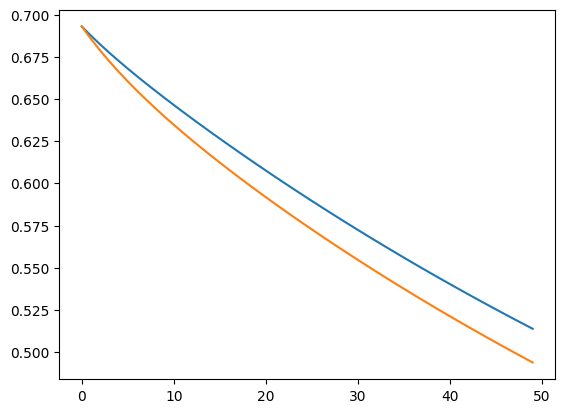

In [15]:
import matplotlib.pyplot as plt
plt.plot(slr.loss)
plt.plot(slr.val_loss)
plt.show()

Decision Boundry